In [3]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats
import statsmodels.api as sm
from PIL import ImageGrab


## We are going to conduct a <font color='red'>2 tailed t-Test</font> on 2 Independent samples with Numerical Data






## <font color='red'>Step 1
#### Make two Hypothesis one contradicting to other 

    
    
    
    
+ **Null Hypothesis:** $\mu_1 = \mu_2$   (`There is no significance difference between diameter of the Cutlets`)
+ **Alternative Hypthosis:** $\mu_1 \neq \mu_2$    (`There is a significance difference between diameter of the Cutlets`)
    
    
## <font color='red'>Step 2
### Decide a cut-off value    

    
+ **Significance 5%**
+ **alpha = 0.05**    
    
    
### As it is a two-tailed test
+ **alpha/2 = 0.025**    
    
    
## <font color='red'>Step 3 
### Collect evidence    
    
    

In [2]:
cutlets=pd.read_csv("Cutlets.csv")

In [3]:
cutlets.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [4]:
unitA=pd.Series(cutlets.iloc[:,0])
unitA

0     6.8090
1     6.4376
2     6.9157
3     7.3012
4     7.4488
5     7.3871
6     6.8755
7     7.0621
8     6.6840
9     6.8236
10    7.3930
11    7.5169
12    6.9246
13    6.9256
14    6.5797
15    6.8394
16    6.5970
17    7.2705
18    7.2828
19    7.3495
20    6.9438
21    7.1560
22    6.5341
23    7.2854
24    6.9952
25    6.8568
26    7.2163
27    6.6801
28    6.9431
29    7.0852
30    6.7794
31    7.2783
32    7.1561
33    7.3943
34    6.9405
Name: Unit A, dtype: float64

In [5]:
unitB=pd.Series(cutlets.iloc[:,1])
unitB

0     6.7703
1     7.5093
2     6.7300
3     6.7878
4     7.1522
5     6.8110
6     7.2212
7     6.6606
8     7.2402
9     7.0503
10    6.8810
11    7.4059
12    6.7652
13    6.0380
14    7.1581
15    7.0240
16    6.6672
17    7.4314
18    7.3070
19    6.7478
20    6.8889
21    7.4220
22    6.5217
23    7.1688
24    6.7594
25    6.9399
26    7.0133
27    6.9182
28    6.3346
29    7.5459
30    7.0992
31    7.1180
32    6.6965
33    6.5780
34    7.3875
Name: Unit B, dtype: float64

In [6]:
# 2-sample 2-tail ttest:   stats.ttest_ind(array1,array2)     # ind -> independent samples
p_value=stats.ttest_ind(unitA,unitB)
p_value

Ttest_indResult(statistic=0.7228688704678063, pvalue=0.4722394724599501)

In [7]:
cutlets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


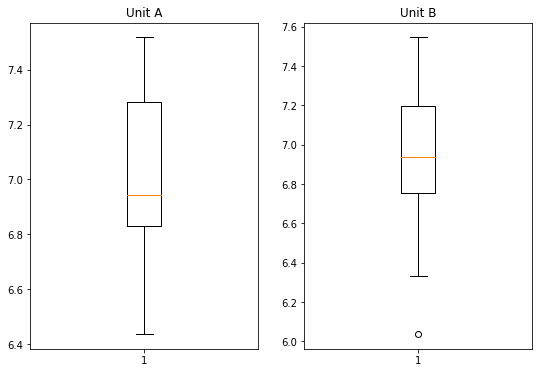

In [8]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(cutlets['Unit A'])
plt.title('Unit A')
plt.subplot(122)
plt.boxplot(cutlets['Unit B'])
plt.title('Unit B')
plt.show()

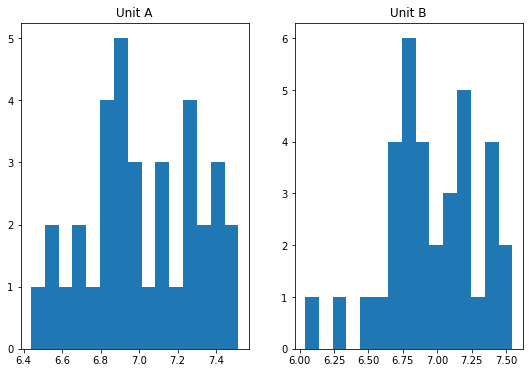

In [9]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.hist(cutlets['Unit A'], bins = 15)
plt.title('Unit A')
plt.subplot(122)
plt.hist(cutlets['Unit B'], bins = 15)
plt.title('Unit B')
plt.show()

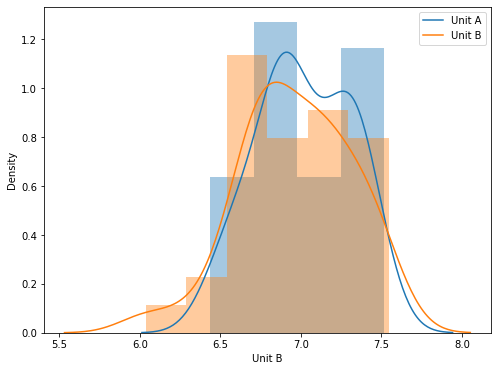

In [10]:
plt.figure(figsize = (8,6))
labels = ['Unit A', 'Unit B']
sns.distplot(cutlets['Unit A'], kde = True)
sns.distplot(cutlets['Unit B'],hist = True)
plt.legend(labels)

### Plotting Q-Q plot to check whether the distribution follows normal distribution or not

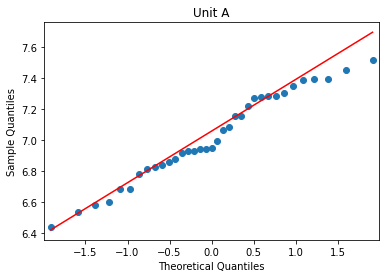

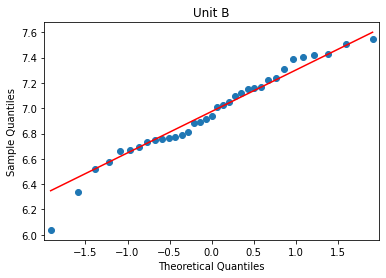

In [11]:
sm.qqplot(cutlets["Unit A"], line = 'q')
plt.title('Unit A')
sm.qqplot(cutlets["Unit B"], line = 'q')
plt.title('Unit B')
plt.show()

## <font color='red'>Step 4 

In [12]:
# compare p_value with α = 0.05 (At 5% significance level)

In [13]:
# P value of the  Independent T Test is =0.45 > α

## so we are fail to reject null hypothesis H0  
(`There is no significance difference between diameter of the Cutlets`)

**Q2**.`A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch .Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.`
 
 


## We are going to conduct a <font color='red'>ANOVA Test</font> on 4 Independent samples with Numerical Data

### We need to check whether the mean of any of these samples are different or the same?

## <font color='red'>Step 1
#### Make two Hypothesis one contradicting to other 
#### Null Hypothesis is want we want to prove

+ **Null Hypothesis:** $\mu_1 = \mu_2$ = $\mu_3$ = $\mu_4$
+ **Alternative Hypthosis:** Atleast One mean is Different

## <font color='red'>Step 2
### Decide a cut-off value

+ **Significance 5%**
+ **alpha = 0.05**

## <font color='red'>Step 3 
### Collect evidence

In [14]:
labTAT=pd.read_csv("LabTAT.csv")

In [15]:
labTAT
labTAT.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [16]:
labTAT.describe()  

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [17]:
labTAT.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

In [18]:
labTAT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


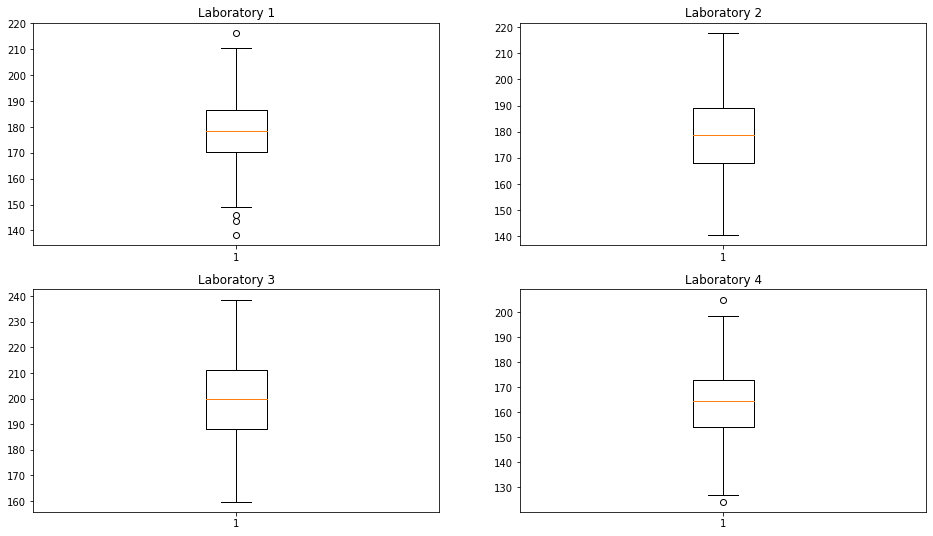

In [19]:
plt.subplots(figsize = (16,9))
plt.subplot(221)
plt.boxplot(labTAT['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(222)
plt.boxplot(labTAT['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(223)
plt.boxplot(labTAT['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(224)
plt.boxplot(labTAT['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

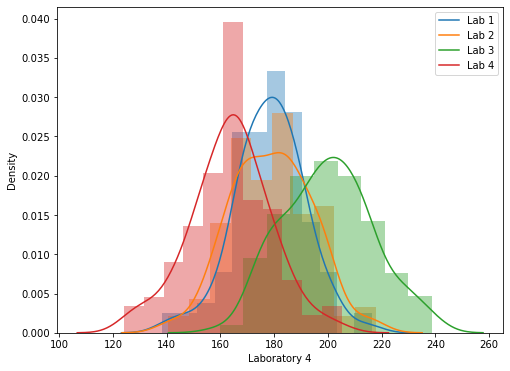

In [20]:
plt.figure(figsize = (8,6))
labels = ['Lab 1', 'Lab 2','Lab 3', 'Lab 4']
sns.distplot(labTAT['Laboratory 1'], hist= True)
sns.distplot(labTAT['Laboratory 2'],hist = True)
sns.distplot(labTAT['Laboratory 3'],hist = True)
sns.distplot(labTAT['Laboratory 4'],hist = True)
plt.legend(labels)

### Plotting Q-Q plot to check whether the distribution follows normal distribution or not

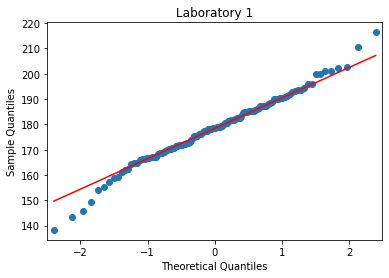

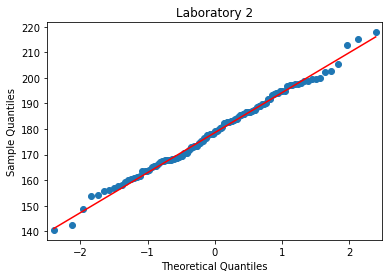

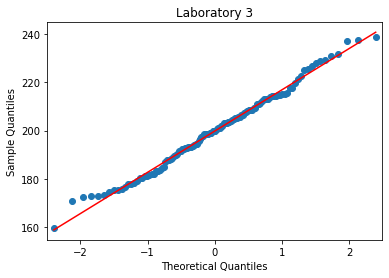

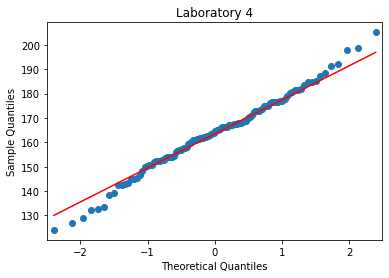

In [21]:
sm.qqplot(labTAT['Laboratory 1'], line = 'q')
plt.title('Laboratory 1')
sm.qqplot(labTAT['Laboratory 2'], line = 'q')
plt.title('Laboratory 2')
sm.qqplot(labTAT['Laboratory 3'], line = 'q')
plt.title('Laboratory 3')
sm.qqplot(labTAT['Laboratory 4'], line = 'q')
plt.title('Laboratory 4')
plt.show()

## <font color='red'>Step 4

### Compare Evidences with Hypothesis using t-statictic

In [22]:
test_statistic , p_value = stats.f_oneway(labTAT.iloc[:,0],labTAT.iloc[:,1],labTAT.iloc[:,2],labTAT.iloc[:,3])
print('p_value =',p_value)

p_value = 2.1156708949992414e-57


In [23]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a one mean is different between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.000
We reject Null Hypothesis there is a one mean is different between TAT of reports of the laboratories


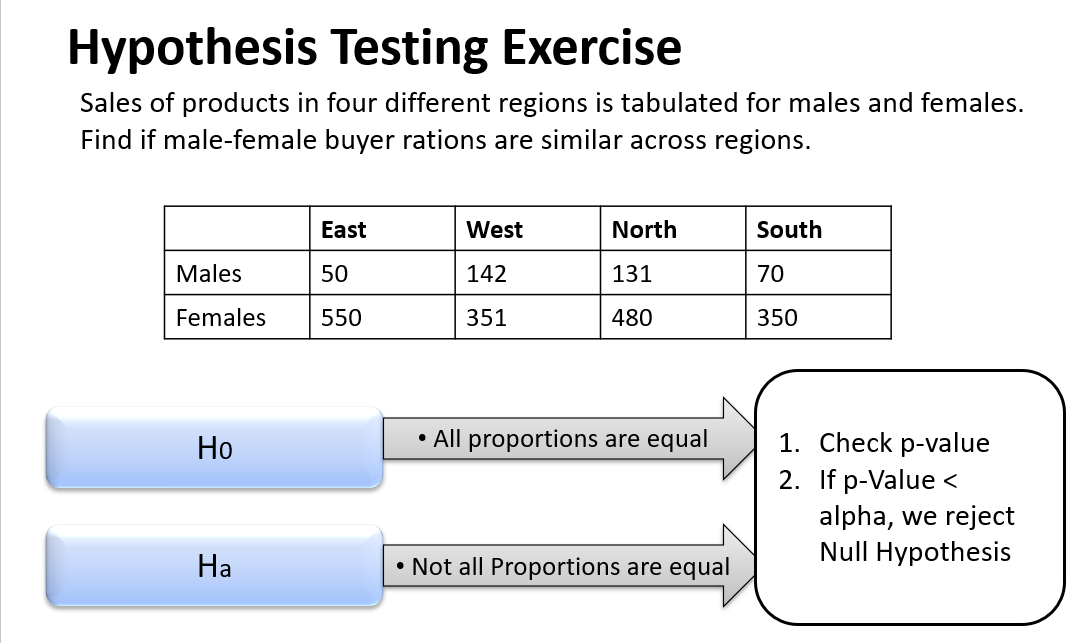

## We are going to conduct a <font color="red">Test of Independence</font> using Chi-Square $\chi_2$ test with Contingency table

### We need to check whether the proportion of any of these samples are different or the same?

## <font color='red'>Step 1
#### Make two Hypothesis one contradicting to other 
#### Null Hypothesis is want we want to prove

+ **Null Hypothesis:** All Proportional are equal
+ **Alternative Hypthosis:** Not all proportional are equal

## <font color='red'>Step 2
### Decide a cut-off value

+ **Significance 5%**
+ **alpha = 0.05**

## <font color='red'>Step 3 
### Collect evidence

In [25]:
buyer=pd.read_csv("BuyerRatio.csv")

In [26]:
buyer

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [27]:
# contingency table
table = [[50, 142, 131, 70],
[435, 1523, 1356, 750]]
print(table)

[[50, 142, 131, 70], [435, 1523, 1356, 750]]


In [28]:
stat, p, dof, expected = stats.chi2_contingency(table)
print('dof=%d' % dof)
print(p)

dof=3
0.6603094907091882


In [29]:
expected

array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
       [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]])

In [30]:
# interpret p-value
alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('We reject Null hypothesis not all proportions are equal')
else:
    print('We are fail to reject null  hypothesis  all proportions are equal')

significance=0.050, p=0.660
We are fail to reject null  hypothesis  all proportions are equal


**Q.4**.` TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences`



## We are going to conduct a <font color="red">Test of Independence</font> using Chi-Square $\chi_2$ test with Contingency table

### We need to check whether the mean of any of these samples are different or the same?

##  <font color='red'>Step 1
#### Make two Hypothesis one contradicting to other 
#### Null Hypothesis is want we want to prove

+ **Null Hypothesis:** = % of defective of all countries are equal i.e % Phillipness=%Indonesia=%Malta=%India
+ **Alternative Hypthosis:** :atlest one defective% is not equal

## <font color='red'>Step 2
### Decide a cut-off value

+ **Significance 5%**
+ **alpha = 0.05**

## <font color='red'>Step 3 
### Collect evidence

In [4]:
data=pd.read_csv("Customer+OrderForm.csv")
data


,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [5]:
data.Phillippines.value_counts()

Error Free    271
Defective      29
Name: Phillippines, dtype: int64

In [6]:
data.Indonesia.value_counts()

Error Free    267
Defective      33
Name: Indonesia, dtype: int64

In [7]:
data.Malta.value_counts()

Error Free    269
Defective      31
Name: Malta, dtype: int64

In [8]:
data.India.value_counts()

Error Free    280
Defective      20
Name: India, dtype: int64

In [11]:
# Make a contingency table
table=np.array([[271,267,269,280],[29,33,31,20]])
table

array([[271, 267, 269, 280],
       [ 29,  33,  31,  20]])

In [14]:
stat, p, dof, expected = stats.chi2_contingency(table)
print('dof=%d' % dof)
print(p)

dof=3
0.2771020991233135


In [17]:
expected

array([[271.75, 271.75, 271.75, 271.75],
       [ 28.25,  28.25,  28.25,  28.25]])

In [23]:
# Compare p_value with α = 0.05
alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('We reject Null hypothesis atlest one defective% is not equal')
else:
    print('We are fail to reject null  hypothesis % of defective of all countries are equal i.e % Phillipness=%Indonesia=%Malta=%India ')

significance=0.050, p=0.277
We are fail to reject null  hypothesis % of defective of all countries are equal i.e % Phillipness=%Indonesia=%Malta=%India 
